# PESTPP-GLM

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import flopy
import pyemu


flopy is installed in /Users/jeremyw/Dev/flopy/flopy


In [2]:
t_d = "template"
m_d = "master_glm"

In [3]:
pst = pyemu.Pst(os.path.join(t_d,"freyberg.pst"))
pst.write_par_summary_table(filename="none")

,type,transform,count,initial value,upper bound,lower bound,standard deviation
pp_strt1,pp_strt1,log,67,0,0.0211893,-0.0222764,0.0108664
grvka3,grvka3,log,705,0,1,-1,0.5
grrech2,grrech2,log,705,0,0.0413927,-0.0457575,0.0217875
vka7_cn,vka7_cn,log,1,0,1,-1,0.5
welflux,welflux,log,2,0 to 0.176091,0.176091 to 0.30103,-0.30103 to 0,0.0752575 to 0.11928
grhk5,grhk5,log,705,0,1,-1,0.5
drncond_k00,drncond_k00,log,10,0,1,-1,0.5
ss6_cn,ss6_cn,log,1,0,1,-1,0.5
ss7_cn,ss7_cn,log,1,0,1,-1,0.5
sy6_cn,sy6_cn,log,1,0,0.243038,-0.60206,0.211275


### reduce the number of adjustable parameters

In [4]:
par = pst.parameter_data

In [5]:
# grid-scale pars
gr_pars = par.loc[par.pargp.apply(lambda x: "gr" in x),"parnme"]
par.loc[gr_pars,"partrans"] = "fixed"
pst.npar_adj

1215

In [6]:
# strk_pars = par.loc[par.pargp=="strk","parnme"]
# p1 = strk_pars.iloc[0]
# par.loc[strk_pars.iloc[1:],"partrans"] = "tied"
# par.loc[strk_pars.iloc[1:],"partied"] = p1
# pst.npar_adj

1176

In [7]:
par.loc[par.pargp.apply(lambda x: "pp" in x),"pargp"].unique()

array(['pp_hk0', 'pp_hk1', 'pp_hk2', 'pp_rech0', 'pp_rech1', 'pp_ss0',
       'pp_ss1', 'pp_ss2', 'pp_strt0', 'pp_strt1', 'pp_strt2', 'pp_sy0',
       'pp_sy1', 'pp_sy2', 'pp_vka0', 'pp_vka1', 'pp_vka2'], dtype=object)

In [8]:
s_pars = par.loc[par.pargp.apply(lambda x: "pp" in x and ("ss" in x or "sy" in x)),"parnme"]
par.loc[s_pars,"partrans"] = "fixed"
pst.npar_adj

774

In [9]:
adj_par = par.loc[par.partrans=="log",:]
adj_par.pargp.value_counts().sort_values()

ss6_cn          1
sy7_cn          1
vka8_cn         1
strt7_cn        1
hk7_cn          1
hk6_cn          1
flow            1
rech5_cn        1
strt6_cn        1
vka6_cn         1
ss8_cn          1
sy8_cn          1
vka7_cn         1
sy6_cn          1
ss7_cn          1
rech4_cn        1
strk            1
strt8_cn        1
hk8_cn          1
welflux         2
welflux_k02     6
drncond_k00    10
pp_strt1       67
pp_hk2         67
pp_vka0        67
pp_rech0       67
pp_strt0       67
pp_vka2        67
pp_hk0         67
pp_strt2       67
pp_hk1         67
pp_rech1       67
pp_vka1        67
Name: pargp, dtype: int64

In [10]:
fi_grps = ["pp_rech1","pp_vka0","pp_vka2","pp_strt0","pp_strt1","pp_strt2"]
par.loc[par.pargp.apply(lambda x: x in fi_grps),"partrans"] = "fixed"
pst.npar_adj

372

In [11]:
pst.control_data.noptmax = 6
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 6
pst.pestpp_options["num_reals"] = 100
pst.write(os.path.join(t_d,"freyberg_pp.pst"))

In [12]:
#pyemu.os_utils.start_slaves(t_d,"pestpp-glm","freyberg_pp.pst",num_slaves=20,slave_root=".",
#                            master_dir=m_d)

In [13]:
df = df=pd.read_csv(os.path.join(m_d,"freyberg_pp.post.obsen.csv"),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)

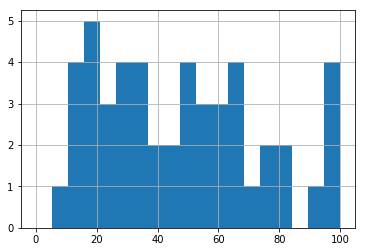

In [14]:
ax = oe.phi_vector.hist(bins=np.linspace(0,100,20))


Here we see the distribution of phi values across the 100 posterior realizations.  Should we accept all of these???

In [34]:
oe_pr = pd.read_csv(os.path.join("master_prior_sweep","sweep_out.csv"),index_col=0)

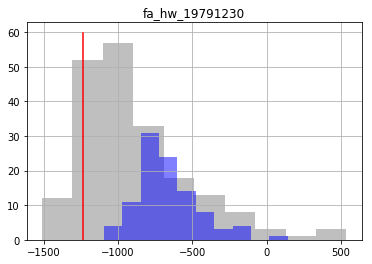

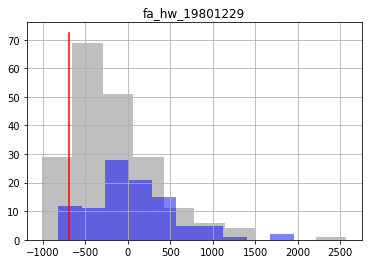

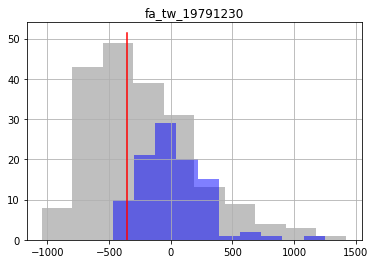

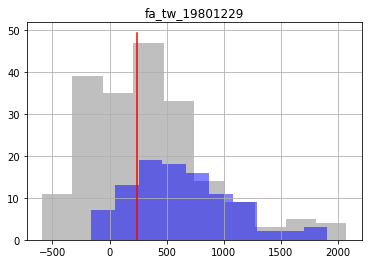

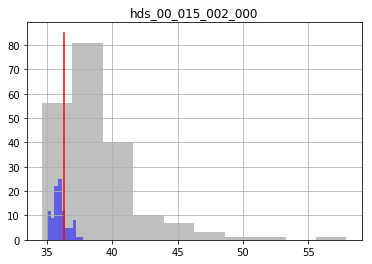

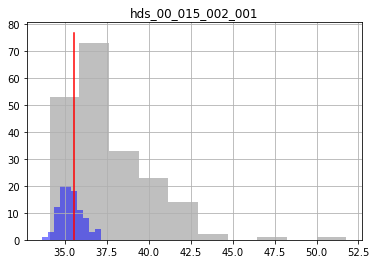

In [37]:
obs = pst.observation_data
fnames = pst.pestpp_options["forecasts"].split(",")
for forecast in fnames:
    ax = plt.subplot(111)
    oe_pr.loc[:,forecast].hist(ax=ax,color="0.5",alpha=0.5)
    oe.loc[:,forecast].hist(ax=ax,color="b",alpha=0.5)
    
    ax.plot([obs.loc[forecast,"obsval"],obs.loc[forecast,"obsval"]],ax.get_ylim(),"r")
    ax.set_title(forecast)
    plt.show()

In [16]:
#todo: regularization - subspace and tikhonov

### Setup of Tikhonov regularization

In [17]:
cov = pyemu.Cov.from_binary(os.path.join(t_d,"prior.jcb"))

In [18]:
pyemu.helpers.first_order_pearson_tikhonov(pst,cov)

getting CC matrix
processing


In [27]:
pst.prior_information.head()

,equation,obgnme,pilbl,weight,names
pilbl,,,,,
pcc_1,1.0 * log(dc0000390005) - 1.0 * log(dc0000390006) = 0.0,regul_cc,pcc_1,0.904837,"[dc0000390005, dc0000390006]"
pcc_2,1.0 * log(dc0000390005) - 1.0 * log(dc0000390007) = 0.0,regul_cc,pcc_2,0.818731,"[dc0000390005, dc0000390007]"
pcc_3,1.0 * log(dc0000390005) - 1.0 * log(dc0000390008) = 0.0,regul_cc,pcc_3,0.740818,"[dc0000390005, dc0000390008]"
pcc_4,1.0 * log(dc0000390005) - 1.0 * log(dc0000390009) = 0.0,regul_cc,pcc_4,0.670320,"[dc0000390005, dc0000390009]"
pcc_5,1.0 * log(dc0000390005) - 1.0 * log(dc0000390010) = 0.0,regul_cc,pcc_5,0.606531,"[dc0000390005, dc0000390010]"


In [20]:
shutil.copy2(os.path.join(m_d,"freyberg_pp.jcb"),os.path.join(t_d,"restart_pp.jcb"))


'template/restart_pp.jcb'

In [25]:
pst.pestpp_options["base_jacobian"] = "restart_pp.jcb"
pst.reg_data.phimlim = pst.nnz_obs
pst.reg_data.phimaccept = pst.reg_data.phimlim * 1.1
pst.write(os.path.join(t_d,"freyberg_pp.pst"))

In [26]:
pyemu.os_utils.start_slaves(t_d,"pestpp-glm","freyberg_pp.pst",num_slaves=20,slave_root=".",
                           master_dir=m_d)

In [28]:
df = df=pd.read_csv(os.path.join(m_d,"freyberg_pp.post.obsen.csv"),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)

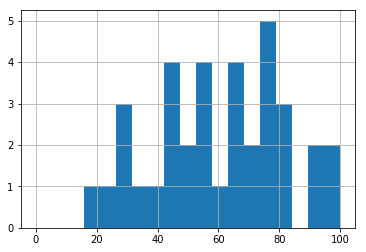

In [29]:
ax = oe.phi_vector.hist(bins=np.linspace(0,100,20))

An interesting point:  the use of Tikhonov seems to have pushed the phi values of the posterior realizations higher.

fa_hw_19791230


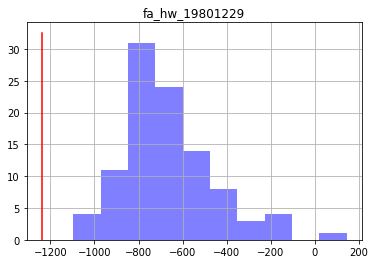

fa_hw_19801229


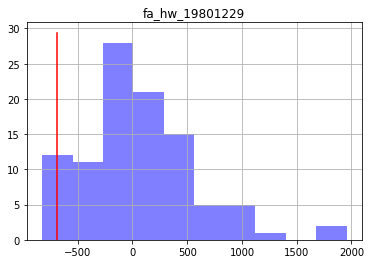

fa_tw_19791230


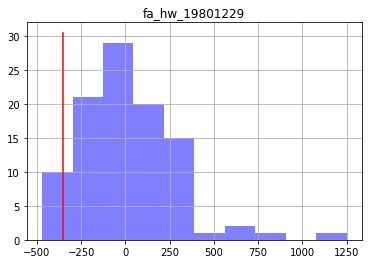

fa_tw_19801229


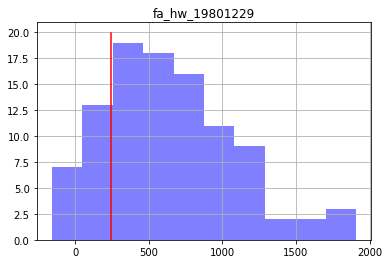

hds_00_015_002_000


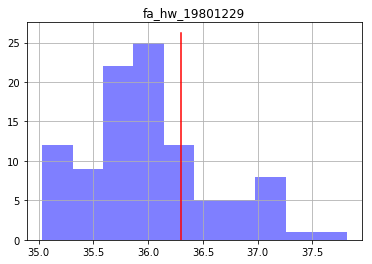

hds_00_015_002_001


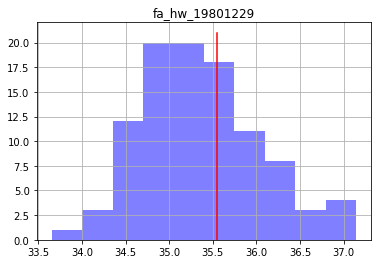

In [33]:
obs = pst.observation_data
fnames = pst.pestpp_options["forecasts"].split(",")
for forecast in fnames:
    ax = plt.subplot(111)
    oe_pr.loc[:,forecast].hist(ax=ax,color="0.5",alpha=0.5)
    oe.loc[:,forecast].hist(ax=ax,color="b",alpha=0.5)
    
    ax.plot([obs.loc[forecast,"obsval"],obs.loc[forecast,"obsval"]],ax.get_ylim(),"r")
    ax.set_title(forecast)
    plt.show()